<a href="https://colab.research.google.com/github/darshil8008/Skin-Tone-Detection/blob/main/Skin_tone_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from collections import Counter
import imutils
import pprint
from matplotlib import pyplot as plt


In [ ]:
def extractSkin(image):
  
  img =  image.copy()
 
  img =  cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  
  lower_threshold = np.array([0, 48, 80], dtype=np.uint8)
  
  upper_threshold = np.array([20, 255, 255], dtype=np.uint8)
  
  skinMask = cv2.inRange(img,lower_threshold,upper_threshold)
  
  skinMask = cv2.GaussianBlur(skinMask,(3,3),0)
  
  skin  =  cv2.bitwise_and(img,img,mask=skinMask)
 
  return cv2.cvtColor(skin,cv2.COLOR_HSV2BGR)

In [ ]:
def removeBlack(estimator_labels, estimator_cluster):
  
  hasBlack = False

  occurance_counter = Counter(estimator_labels)

  compare = lambda x, y: Counter(x) == Counter(y)
   
  for x in occurance_counter.most_common(len(estimator_cluster)):

    color = [int(i) for i in estimator_cluster[x[0]].tolist() ]
    
    if compare(color , [0,0,0]) == True:
      
      del occurance_counter[x[0]]
       
      hasBlack = True
      estimator_cluster = np.delete(estimator_cluster,x[0],0)
      break
      
  return (occurance_counter,estimator_cluster,hasBlack)

In [ ]:
def getColorInformation(estimator_labels, estimator_cluster,hasThresholding=False):
  
  occurance_counter = None
  
  colorInformation = []
  
  hasBlack =False
  
  if hasThresholding == True:
    
    (occurance,cluster,black) = removeBlack(estimator_labels,estimator_cluster)
    occurance_counter =  occurance
    estimator_cluster = cluster
    hasBlack = black
    
  else:
    occurance_counter = Counter(estimator_labels)

  totalOccurance = sum(occurance_counter.values()) 
  
  for x in occurance_counter.most_common(len(estimator_cluster)):
    
    index = (int(x[0]))
   
    index =  (index-1) if ((hasThresholding & hasBlack)& (int(index) !=0)) else index
   
    color = estimator_cluster[index].tolist()
  
    color_percentage= (x[1]/totalOccurance)
  
    colorInfo = {"cluster_index":index , "color": color , "color_percentage" : color_percentage }
 
    colorInformation.append(colorInfo)
    
  return colorInformation 

In [ ]:
def extractDominantColor(image,number_of_colors=5,hasThresholding=False):
  
  if hasThresholding == True:
    number_of_colors +=1

  img = image.copy()
  
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

  img = img.reshape((img.shape[0]*img.shape[1]) , 3)

  estimator = KMeans(n_clusters=number_of_colors, random_state=0)
 
  estimator.fit(img)
 
  colorInformation = getColorInformation(estimator.labels_,estimator.cluster_centers_,hasThresholding)
  return colorInformation

In [ ]:
def plotColorBar(colorInformation):
  
  color_bar = np.zeros((100,500,3), dtype="uint8")

  top_x = 0
  for x in colorInformation:    
    bottom_x = top_x + (x["color_percentage"] * color_bar.shape[1])

    color = tuple(map(int,(x['color'])))
  
    cv2.rectangle(color_bar , (int(top_x),0) , (int(bottom_x),color_bar.shape[0]) ,color , -1)
    top_x = bottom_x
  return color_bar

In [ ]:
def prety_print_data(color_info):
  for x in color_info:
    print(pprint.pformat(x))
    print()

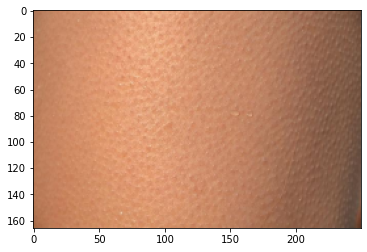

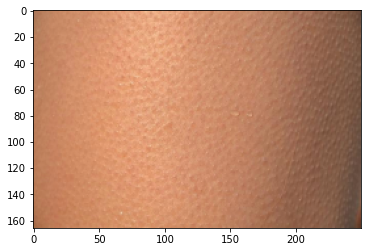

Color Information
{'cluster_index': 1,
 'color': [214.9309866962328, 147.09894678492063, 109.13128233554943],
 'color_percentage': 0.2632771084337349}

{'cluster_index': 5,
 'color': [198.362190626645, 133.93586097946317, 99.34049499736714],
 'color_percentage': 0.22881927710843372}

{'cluster_index': 4,
 'color': [229.87185523025096, 162.09357069295166, 122.90760629689612],
 'color_percentage': 0.16130120481927712}

{'cluster_index': 2,
 'color': [177.51171274961519, 120.59543010752726, 90.63037634408633],
 'color_percentage': 0.12568674698795182}

{'cluster_index': 3,
 'color': [147.2084703947384, 101.21032072368264, 78.31517269736757],
 'color_percentage': 0.11730120481927711}

{'cluster_index': 0,
 'color': [122.73654916512321, 87.30728200370865, 67.97425788497132],
 'color_percentage': 0.10361445783132531}

Color Bar


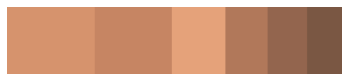

In [ ]:
image =  imutils.url_to_image("https://raw.githubusercontent.com/octalpixel/Skin-Extraction-from-Image-and-Finding-Dominant-Color/master/skin_2.jpg")

image = imutils.resize(image,width=250)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

skin = extractSkin(image)

plt.imshow(cv2.cvtColor(skin,cv2.COLOR_BGR2RGB))
plt.show()
 
dominantColors = extractDominantColor(skin,hasThresholding=True)

print("Color Information")
prety_print_data(dominantColors)

print("Color Bar")
colour_bar = plotColorBar(dominantColors)
plt.axis("off")
plt.imshow(colour_bar)
plt.show()